In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

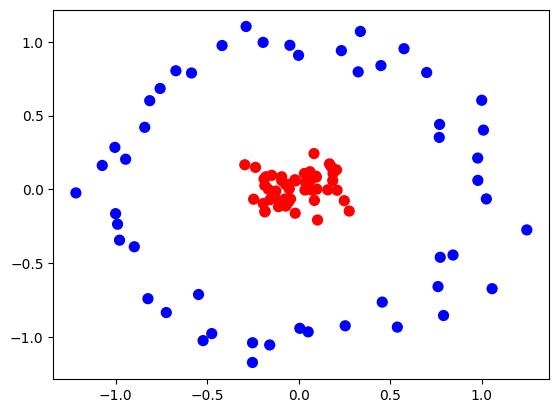

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.3

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

/tmp/ipykernel_10937/3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


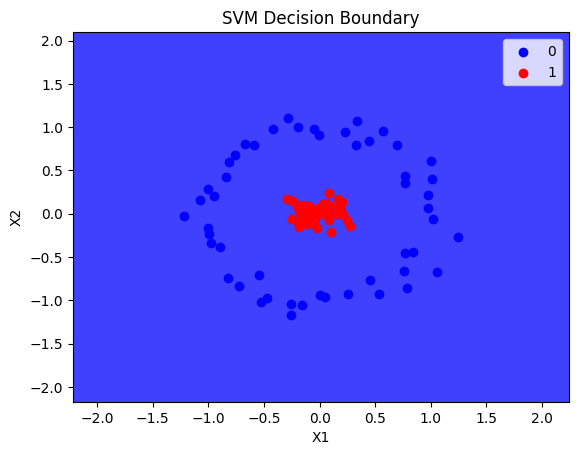

In [8]:
plot_decision_boundary(X, y, classifier)

In [9]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

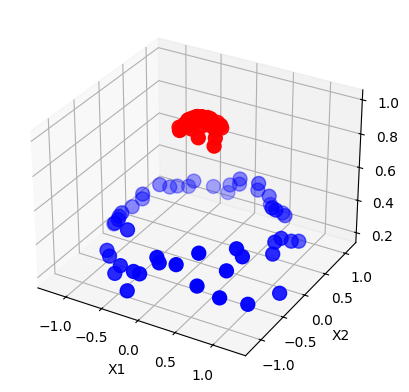

In [10]:
plot_3d_plot(X,y)

In [11]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipykernel_10937/3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


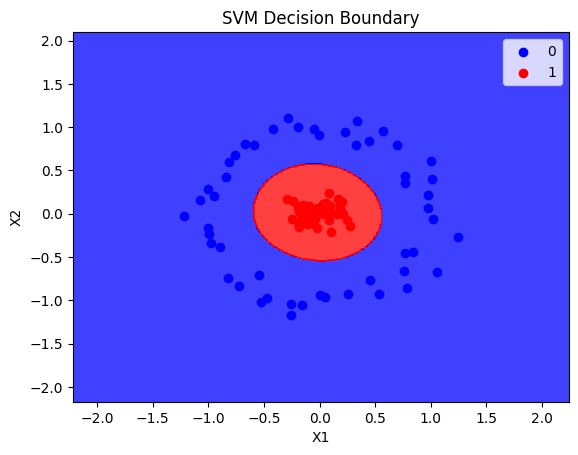

In [13]:
plot_decision_boundary(X, y, rbf_classifier)

In [14]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

1.0

/tmp/ipykernel_10937/3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


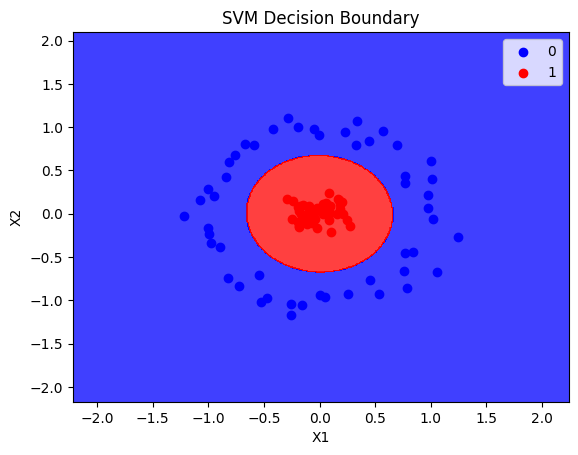

In [16]:
plot_decision_boundary(X, y, poly_classifier)

In [17]:
X

array([[-2.37019288e-01,  1.50036431e-01],
       [ 8.49614231e-02, -7.42964199e-02],
       [-8.98979173e-01, -3.88007182e-01],
       [ 8.26687256e-02,  2.43218658e-01],
       [ 8.42043218e-01, -4.44003759e-01],
       [-8.14640390e-01,  6.01548864e-01],
       [ 2.75154780e-01, -1.46122530e-01],
       [-1.11521990e-01, -1.16322163e-01],
       [ 1.84865775e-01,  5.99338425e-02],
       [-1.00118511e+00, -1.63873618e-01],
       [ 4.48396728e-01,  8.39337017e-01],
       [ 9.54974961e-02,  8.39126326e-02],
       [-1.07415811e+00,  1.62828927e-01],
       [ 7.72289020e-01, -4.59384361e-01],
       [ 2.47987203e-01, -7.59937397e-02],
       [-1.57095222e-01, -6.83098593e-02],
       [-7.16561918e-02, -1.12509587e-01],
       [-4.55985221e-02, -6.44569282e-02],
       [-1.66075677e-01,  7.22398208e-04],
       [-1.25964728e-01, -1.04905061e-02],
       [ 1.67291814e-01,  1.73242689e-01],
       [-5.76786089e-02,  3.44035200e-02],
       [-9.90517472e-01, -2.35364254e-01],
       [-1.

In [20]:
np.exp(-(X**2)).sum(1)

array([1.92311126, 1.9873028 , 1.30591086, 1.93574954, 1.3131942 ,
       1.21135308, 1.90595942, 1.97420015, 1.9628164 , 1.34051082,
       1.31222597, 1.98390509, 1.28926603, 1.36052076, 1.93459675,
       1.97096776, 1.98229992, 1.99377686, 1.97279523, 1.98414806,
       1.94283433, 1.9954958 , 1.32099926, 1.9432286 , 1.11100699,
       1.2262465 , 1.06256086, 1.37713736, 1.9572637 , 1.94565122,
       1.3434648 , 1.9963184 , 1.21566105, 1.21092749, 1.24538894,
       1.43834007, 1.95384667, 1.36726805, 1.43028256, 1.16042503,
       1.37128748, 1.93643053, 1.16801868, 1.99327802, 1.22489039,
       1.36402226, 1.9539646 , 1.08512398, 1.99725913, 1.96898024,
       1.36031854, 1.88882468, 1.99031329, 1.19094505, 1.34069513,
       1.99486808, 1.96525896, 1.34622183, 1.94116848, 1.98388016,
       1.99630514, 1.98774578, 1.32971171, 1.01774658, 0.96471062,
       1.20970595, 1.13984805, 1.99023755, 1.95933142, 1.28598187,
       1.97547723, 1.33299451, 1.99132796, 1.38056524, 1.98216

In [21]:
X_new=np.exp(-(X**2))

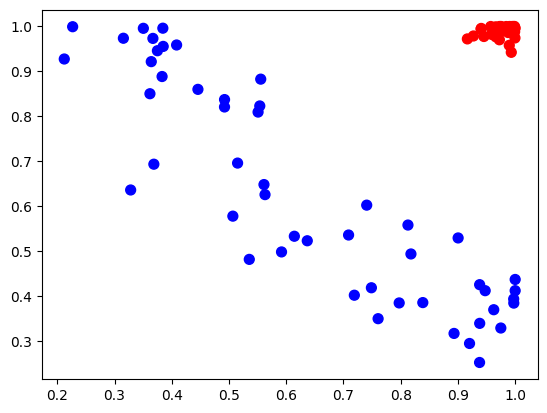

In [22]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')